In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# create empty lists
city_list = []
lat_list = []
lon_list = []
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []

# run for loop
for city in cities:
    # Build query URL
    query_url = url + "&q=" + city
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        city_list.append(weather_json["name"])
        lat_list.append(weather_json["coord"]["lat"])
        lon_list.append(weather_json["coord"]["lon"])
        temperature_list.append(weather_json["main"]["temp"])
        humidity_list.append(weather_json["main"]["humidity"])
        cloudiness_list.append(weather_json["clouds"]["all"])
        wind_speed_list.append(weather_json["wind"]["speed"])
        
    except KeyError:
        next

In [4]:
# make a dictionary
weather_dict = {"City": city_list, 
                "Latitude": lat_list, 
                "Longitude": lon_list, 
                "Temperature": temperature_list, 
                "Humidity": humidity_list, 
                "Cloudiness": cloudiness_list, 
                "Wind_Speed": wind_speed_list}

In [5]:
# make a dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Lagoa,37.14,-8.45,73.40,69,0,9.17
1,Geraldton,49.72,-86.95,59.00,93,90,12.75
2,Talnakh,69.49,88.39,48.62,70,8,11.77
3,Mar del Plata,-46.43,-67.52,44.75,67,24,3.38
4,Saint-Philippe,45.36,-73.48,77.43,83,75,6.93
5,Mataura,-46.19,168.86,40.34,86,80,11.65
6,Itarema,-2.92,-39.92,88.49,62,12,15.01
7,Avarua,-21.21,-159.78,71.60,83,40,13.87
8,Albany,42.65,-73.75,73.40,73,90,6.93
9,Lebu,8.96,38.73,64.40,72,75,9.17


In [6]:
# save dataframe to csv file
weather_df.to_csv(output_data_file)

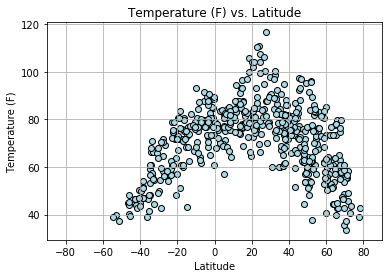

In [7]:
# Temperature (F) vs. Latitude

#set scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o", facecolor="lightblue", edgecolor="black")

# Set the upper and lower limits of our x axis
plt.xlim(-90, 90)

# Set the title and the labels
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("output_data/temperature_latitude.png")

plt.show()

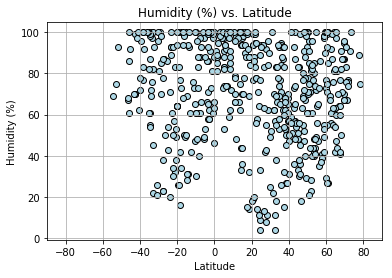

In [8]:
# Humidity (%) vs. Latitude

#set scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", facecolor="lightblue", edgecolor="black")

# Set the upper and lower limits of our x axis
plt.xlim(-90, 90)

# Set the title and the labels
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("output_data/humidity_latitude.png")

plt.show()

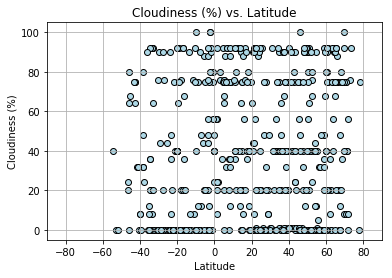

In [9]:
# Cloudiness (%) vs. Latitude

#set scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", facecolor="lightblue", edgecolor="black")

# Set the upper and lower limits of our x axis
plt.xlim(-90, 90)

# Set the title and the labels
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("output_data/cloudiness_latitude.png")

plt.show()

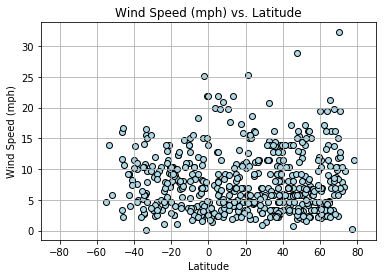

In [10]:
# Wind Speed (mph) vs. Latitude

#set scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind_Speed"], marker="o", facecolor="lightblue", edgecolor="black")

# Set the upper and lower limits of our x axis
plt.xlim(-90, 90)

# Set the title and the labels
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("output_data/wind_speed_latitude.png")

plt.show()